In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
project_id = 'datasci-kalampree'
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list

!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -

!apt -qq update

!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  93962      0 --:--:-- --:--:-- --:--:-- 93962
OK
47 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 47 not upgraded.
Need to get 11.5 MB of archives.
After this operation, 27.2 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.41.1_amd64.deb ...
Unpacking gcsfuse (0.41.1) ...
Setting up gcsfuse (0.41.1) ...


In [ ]:
!mkdir colab_directory

!gcsfuse --implicit-dirs datasci-kalampree colab_directory

2022/05/20 15:49:52.688733 Start gcsfuse/0.41.1 (Go version go1.17.6) for app "" using mount point: /content/colab_directory
2022/05/20 15:49:52.703962 Opening GCS connection...
2022/05/20 15:49:53.818326 Mounting file system "datasci-kalampree"...
2022/05/20 15:49:53.822215 File system has been successfully mounted.


# Pre-process

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
def changeToClosetValue(v):
    dif = 1000
    new_value = v
    for k in rgb2value:
        tmp = [int(e) for e in k.split(',')]
        # print(tmp, v)
        # calculate dif
        d = abs(tmp[0]-v[0]) + abs(tmp[1]-v[1]) + abs(tmp[2]-v[2])
        if d < dif:
            new_value = tmp
            dif = d
    return new_value

In [ ]:
rgb2value = {
    '0,0,0'      : 0.0,
    '0,255,128'  : 5.0,
    '0,255,0'    : 10.0,
    '0,175,0'    : 15.0,
    '0,150,50'   : 20.0,
    '255,255,0'  : 25.0,
    '255,200,0'  : 30.0,
    '255,170,0'  : 35.0,
    '255,85,0'   : 40.0,
    '255,0,0'    : 45.0,
    '255,0,100'  : 50.0,
    '255,0,255'  : 55.0,
    '255,128,255': 60.0,
    '255,200,255': 65.0,
    '255,225,255': 70.0,
    '255,255,255': 75.0,
}

In [ ]:
img_cv = cv2.imread('/content/colab_directory/train_radarNJ/bkk_radar_images_all/1592461954.png')

In [ ]:
img_cv.shape

(2034, 2048, 3)

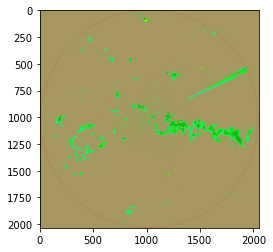

In [ ]:
im2 = Image.open('/content/colab_directory/train_radarNJ/bkk_radar_images_all/1592461954.png').convert('RGB')
plt.imshow(im2)
plt.show()

In [ ]:
im = Image.open('/content/colab_directory/train_radarNJ/bkk_radar_images_all/1592461954.png').convert('RGB')
width, height = im.size
  
for i in range(width):
  for j in range(height):
    # print(i,j)
    pixel_value = im.getpixel((i,j))
    if pixel_value == (165, 151, 95):
      im.putpixel( (i, j), (0,0,0) )
    else:
      im.putpixel( (i, j), tuple(changeToClosetValue(pixel_value)) )
  
# im.show()

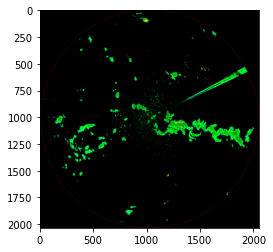

In [ ]:
plt.imshow(im)
plt.show()

In [ ]:
input_map = np.array(im)

In [ ]:
input_map.shape

(2034, 2048, 3)

In [ ]:
def rgb2intensity(pixel):
  pixel = tuple(pixel)
  if pixel == (0,0,0):
    return 0.0
  elif pixel == (0,255,128):
    return 5.0
  elif pixel == (0,255,0):
    return 10.0
  elif pixel == (0,175,0):
    return 15.0
  elif pixel == (0,150,50):
    return 20.0
  elif pixel == (255,255,0):
    return 25.0
  elif pixel == (255,200,0):
    return 30.0
  elif pixel == (255,170,0):
    return 35.0
  elif pixel == (255,85,0):
    return 40.0
  elif pixel == (255,0,0):
    return 45.0
  elif pixel == (255,0,100):
    return 50.0
  elif pixel == (255,0,255):
    return 55.0
  elif pixel == (255,128,255):
    return 60.0
  elif pixel == (255,200,255):
    return 65.0
  elif pixel == (255,225,255):
    return 70.0
  else:
    return 75.0


In [ ]:
def intensity2rgb(intensity):
  value = {
      0: [0,0,0],
      5: [0,255,128],
      10: [0,255,0],
      15: [0,175,0],
      20: [0,150,50],
      25: [255,255,0],
      30: [255,200,0],
      35: [255,170,0],
      40: [255,85,0],
      45: [255,0,0],
      50: [255,0,100],
      55: [255,0,255],
      60: [255,128,255],
      65: [255,200,255],
      70: [255,225,255],
      75: [255,255,255]
  }
  return value[intensity]

In [ ]:
pixel = input_map[1100,1100]

In [ ]:
tuple(pixel)

(0, 255, 128)

In [ ]:
tuple(pixel)

(0, 255, 128)

In [ ]:
intensity_img = np.zeros((input_map.shape[0],input_map.shape[1])).astype('float32')

In [ ]:
for i in range(input_map.shape[0]):
  for j in range(input_map.shape[1]):
    intensity_img[i,j] = rgb2intensity(input_map[i,j])

In [ ]:
intensity_img.shape

(2034, 2048)

In [ ]:
intensity_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
intensity_img /= 75

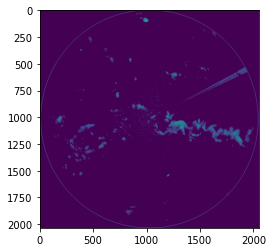

In [ ]:
plt.imshow(intensity_img)
plt.show()

#Post process

In [ ]:
temp_post = intensity_img * 15 // 1 * 5

In [ ]:
post_img = np.zeros((intensity_img.shape[0],intensity_img.shape[1],3)).astype('uint8')

In [ ]:
post_img.shape

(2034, 2048, 3)

In [ ]:
for i in range(post_img.shape[0]):
  for j in range(post_img.shape[1]):
    post_img[i,j] = intensity2rgb(temp_post[i,j])

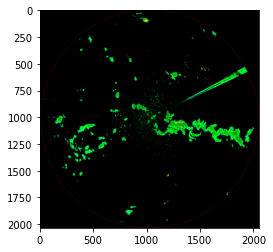

In [ ]:
plt.imshow(post_img)
plt.show()

# Test map rgb to gray

In [97]:
map_gray2rgb = {
    0: [0,0,0],
      5: [0,255,128],
      10: [0,255,0],
      15: [0,175,0],
      20: [0,150,50],
      25: [255,255,0],
      30: [255,200,0],
      35: [255,170,0],
      40: [255,85,0],
      45: [255,0,0],
      50: [255,0,100],
      55: [255,0,255],
      60: [255,128,255],
      65: [255,200,255],
      70: [255,225,255],
      75: [255,255,255]
}

def rgb2gray(img_rgb):
    img_gray = np.zeros((img_rgb.shape[0], img_rgb.shape[1]))
    for gray, rgb in map_gray2rgb.items():
        img_gray[:,:][img_rgb == rgb] = gray
    return img_gray

def gray2rgb(img_gray):
    img_rgb = np.zeros((img_gray.shape[0], img_gray.shape[1], 3))
    for gray, rgb in map_rgb2gray.items():
        img_rgb[img_gray == gray] = rgb
    return img_rgb

In [86]:
rgb_test = Image.open('/content/colab_directory/train_radarNJ/bkk_radar_images_all/1592461954.png').convert('RGB')

In [92]:
width, height = rgb_test.size
for i in range(width):
  for j in range(height):
    # print(i,j)
    pixel_value = rgb_test.getpixel((i,j))
    if pixel_value == (165, 151, 95):
      rgb_test.putpixel( (i, j), (0,0,0) )
    else:
      rgb_test.putpixel( (i, j), tuple(changeToClosetValue(pixel_value)) )
input_map = np.array(rgb_test)
intensity_img = np.zeros((input_map.shape[0],input_map.shape[1])).astype('float32')

In [87]:
rgb2gray(rgb_test)

AttributeError: ignored

# Test inference

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/Shareddrives/Datasci/rainnet_model')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 928, 928, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 928, 928, 64  2368        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 928, 928, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
def pre_processing(pil_img):
  width, height = pil_img.size
  
  for i in range(width):
    for j in range(height):
      # print(i,j)
      pixel_value = pil_img.getpixel((i,j))
      if pixel_value == (165, 151, 95):
        pil_img.putpixel( (i, j), (0,0,0) )
      else:
        pil_img.putpixel( (i, j), tuple(changeToClosetValue(pixel_value)) )
  input_map = np.array(pil_img)
  intensity_img = np.zeros((input_map.shape[0],input_map.shape[1])).astype('float32')
  
  #rgb2intersity
  for i in range(input_map.shape[0]):
    for j in range(input_map.shape[1]):
      intensity_img[i,j] = rgb2intensity(input_map[i,j])
  intensity_img /= 75
  intensity_img = cv2.resize(intensity_img, (928,928),interpolation = cv2.INTER_NEAREST) 
  intensity_img = np.log(intensity_img+0.01)

  return intensity_img

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [78]:
def post_processing(pred_img):
  tmp_img = np.squeeze(np.array(pred_img))

  plt.title('raw predict')
  plt.imshow(tmp_img)
  plt.show()

  tmp_img = np.exp(tmp_img) - 0.01

  plt.title('expo transform')
  plt.imshow(tmp_img)
  plt.show()

  tmp_img = cv2.resize(tmp_img, (2034,2048),interpolation = cv2.INTER_NEAREST) 

  tmp_img = NormalizeData(tmp_img) * 15

  tmp_img = tmp_img.astype('uint8') * 5 

  plt.title('resize and nomalize')
  plt.imshow(tmp_img)
  plt.show()

  rgb_img = np.zeros((tmp_img.shape[0],tmp_img.shape[1],3)).astype('uint8')

  for i in range(rgb_img.shape[0]):
    for j in range(rgb_img.shape[1]):
      rgb_img[i,j] = intensity2rgb(tmp_img[i,j])
  
  plt.title('rgb image')
  plt.imshow(rgb_img)
  plt.show()
  return rgb_img

In [ ]:
#predict n time frame using recursive
def prediction_n_time_frame(model_instance, X, lead_time=12):
    #assume X is prepocessed
    
    
    nwcst = []

    for _ in range(lead_time):
        # make prediction
        pred = model_instance.predict(X)
        # append prediction to holder
        nwcst.append(post_processing(pred))
        # append prediction to the input shifted on one step ahead
        X = np.concatenate([X[::, ::, ::, 1:], pred], axis=-1)
    
    return nwcst

In [ ]:
def predict_one_image():
  img1 = Image.open('/content/colab_directory/train_radarNJ/bkk_radar_images_all/1592461954.png').convert('RGB')
  img2 = Image.open('/content/colab_directory/train_radarNJ/bkk_radar_images_all/1592462136.png').convert('RGB')
  img3 = Image.open('/content/colab_directory/train_radarNJ/bkk_radar_images_all/1592462768.png').convert('RGB')
  img4 = Image.open('/content/colab_directory/train_radarNJ/bkk_radar_images_all/1592463068.png').convert('RGB')

  tmp_x = []

  tmp_x.append(pre_processing(img1))
  tmp_x.append(pre_processing(img2))
  tmp_x.append(pre_processing(img3))
  tmp_x.append(pre_processing(img4))

  X = np.array(tmp_x)
  X = X[np.newaxis,:,:]
  X = np.moveaxis(X,1,-1)

  y_pred = model.predict(X)
  y_pred.shape

  # plt.imshow(np.squeeze(y_pred))
  # plt.show()

  out_img = post_processing(y_pred)
  # plt.imshow(out_img)
  # plt.show() 
  return out_img , X

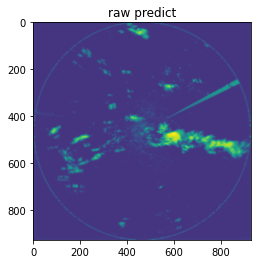

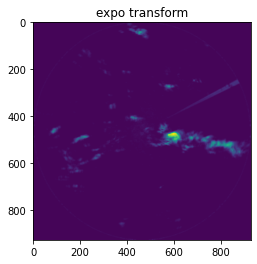

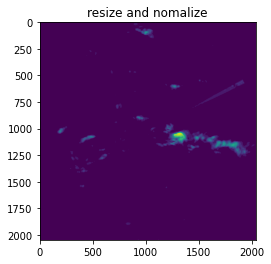

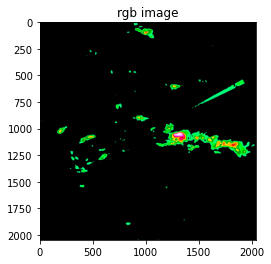

In [ ]:
res,x = predict_one_image()

In [ ]:
def create_alpha_image(rgb_img,filename):
  alpha_img = np.zeros((rgb_img.shape[0],rgb_img.shape[1],4), dtype=np.uint8)
  for x in range(rgb_img.shape[0]):
    for y in range(rgb_img.shape[1]):
      rgb = tuple(rgb_img[x,y])
      if rgb == (0,0,0):
        alpha_img[x, y] = (0,0,0,0)
      else:
        alpha_img[x, y] = np.concatenate((rgb_img[x,y] , np.array([255])))

  img = Image.fromarray(alpha_img)
  img.save(f'{filename}.png')
  return img

In [ ]:
alpha_img = create_alpha_image(res,'test_1592463277')

In [79]:
def predict_one_image_filename(filenames):

  img1 = Image.open(f'/content/colab_directory/train_radarNJ/bkk_radar_images_all/{filenames[0]}.png').convert('RGB')
  img2 = Image.open(f'/content/colab_directory/train_radarNJ/bkk_radar_images_all/{filenames[1]}.png').convert('RGB')
  img3 = Image.open(f'/content/colab_directory/train_radarNJ/bkk_radar_images_all/{filenames[2]}.png').convert('RGB')
  img4 = Image.open(f'/content/colab_directory/train_radarNJ/bkk_radar_images_all/{filenames[3]}.png').convert('RGB')

  tmp_x = []

  tmp_x.append(pre_processing(img1))
  tmp_x.append(pre_processing(img2))
  tmp_x.append(pre_processing(img3))
  tmp_x.append(pre_processing(img4))

  X = np.array(tmp_x)
  X = X[np.newaxis,:,:]
  X = np.moveaxis(X,1,-1)

  y_pred = model.predict(X)
  print(y_pred.shape)

  # plt.imshow(np.squeeze(y_pred))
  # plt.show()

  out_img = post_processing(y_pred)
  # plt.imshow(out_img)
  # plt.show() 
  return out_img , X


In [80]:
filenames = [1620125544,1620125840,1620126142,1620126438]

(1, 928, 928, 1)


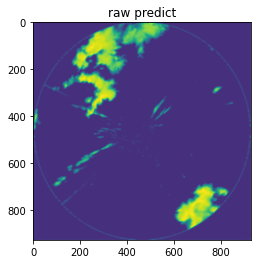

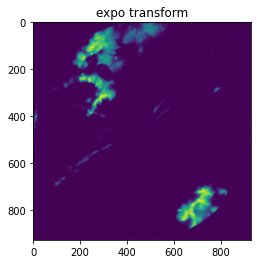

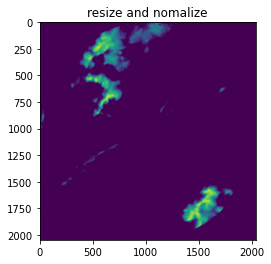

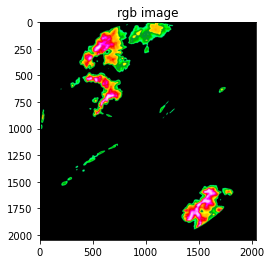

In [81]:
res_img , x2 = predict_one_image_filename(filenames)

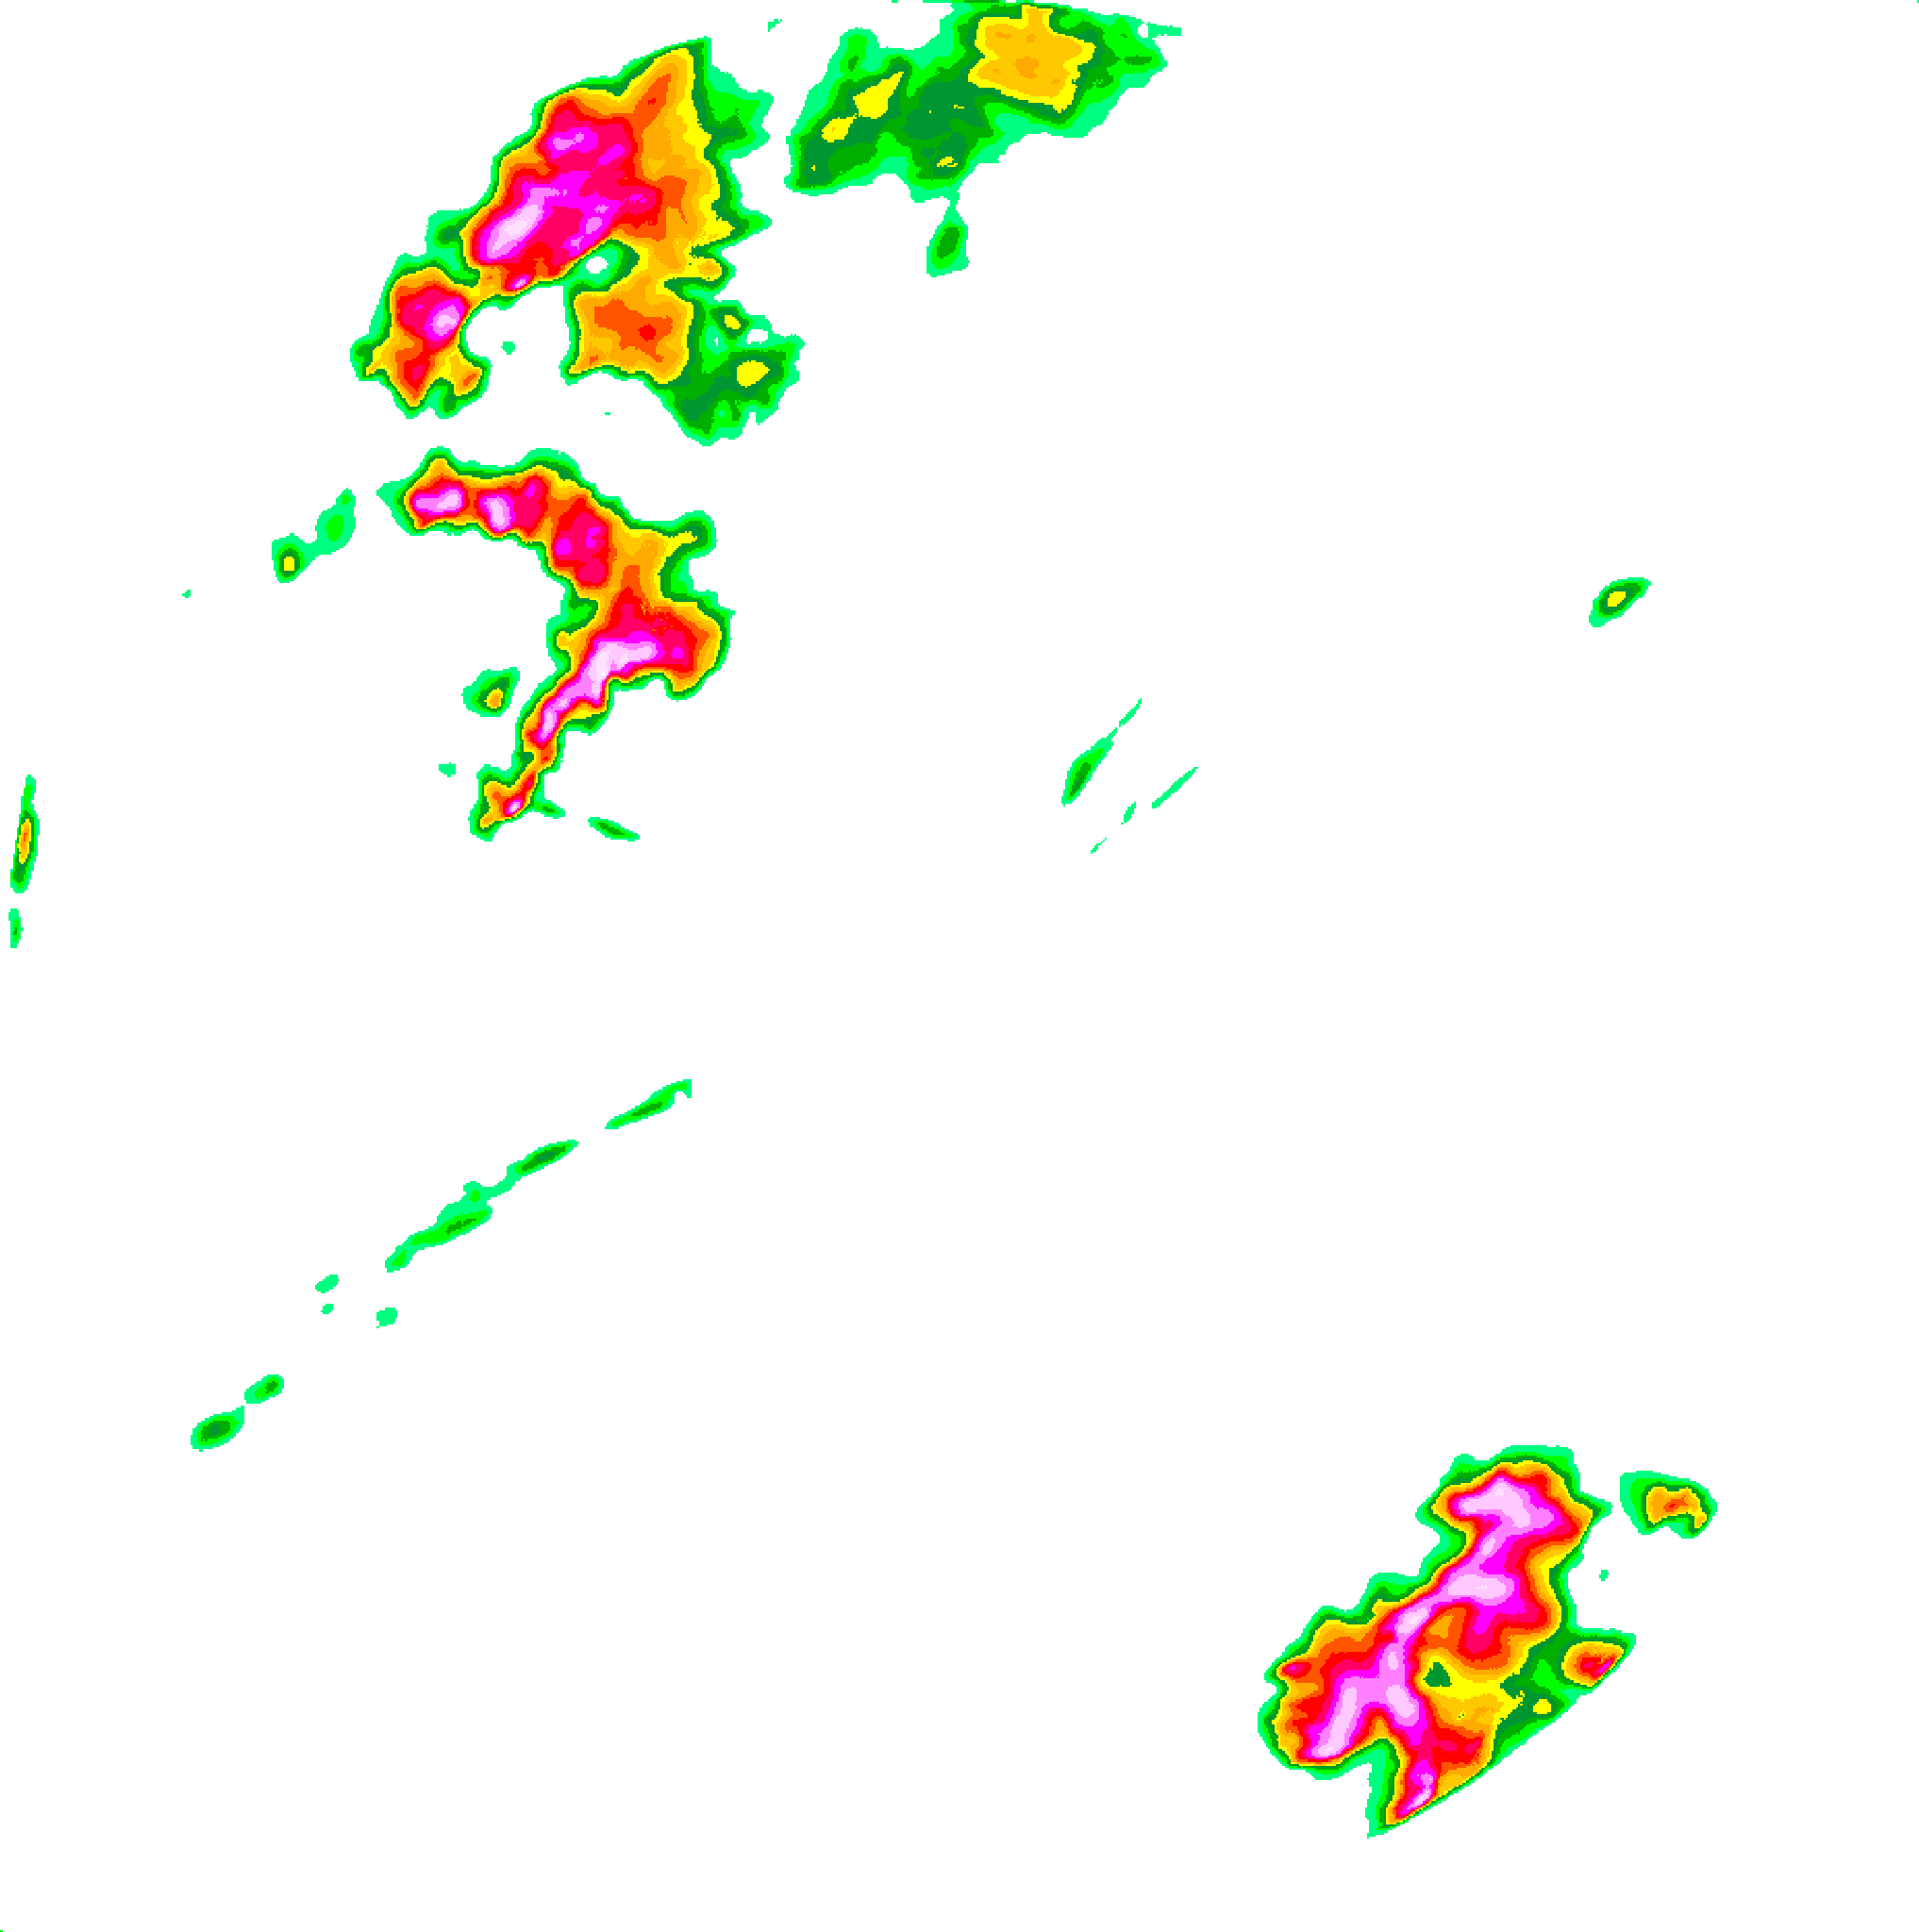

In [ ]:
create_alpha_image(res_img,'test_1620128546')

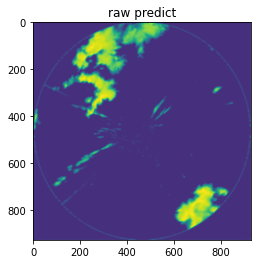

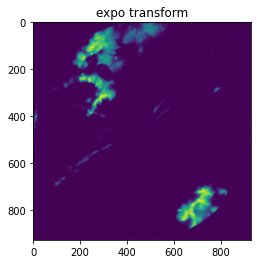

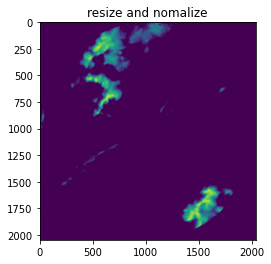

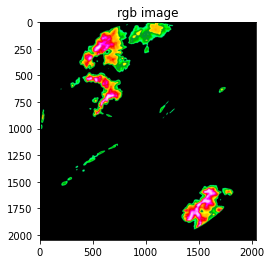

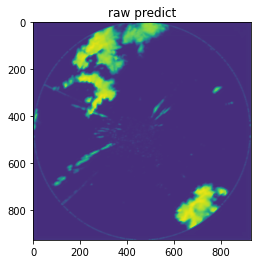

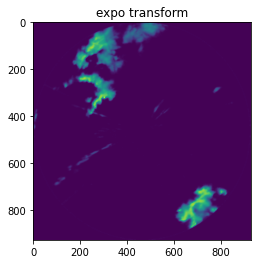

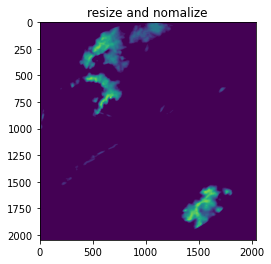

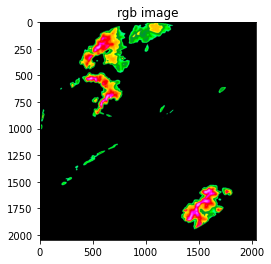

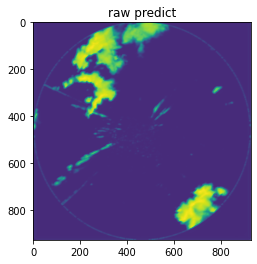

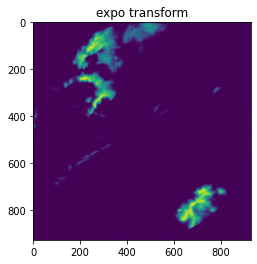

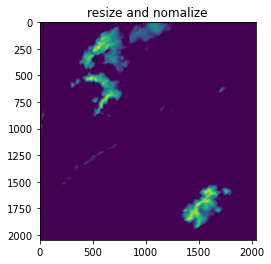

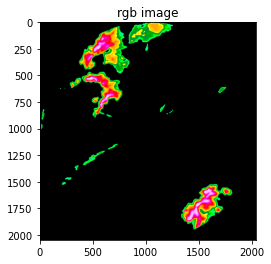

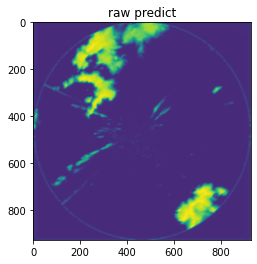

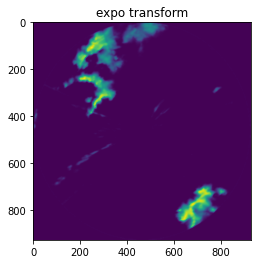

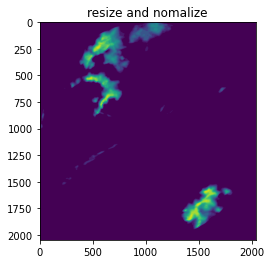

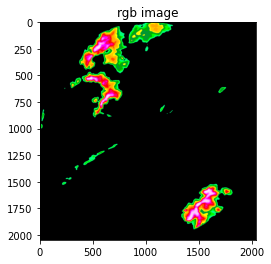

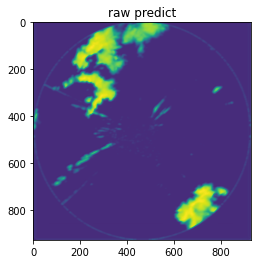

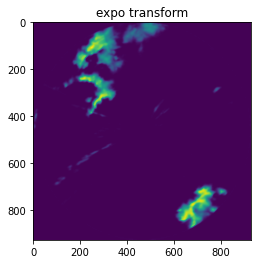

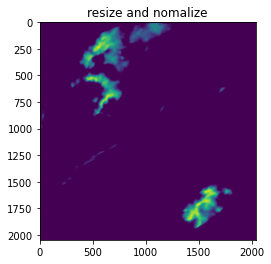

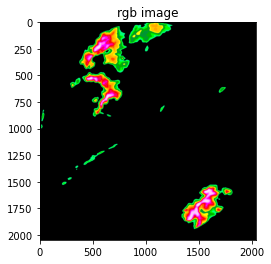

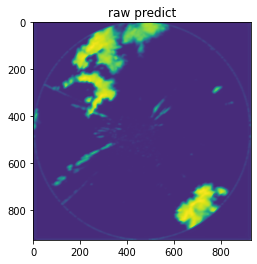

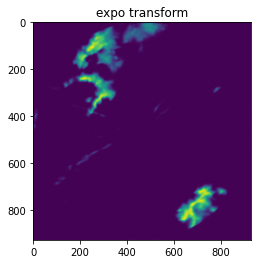

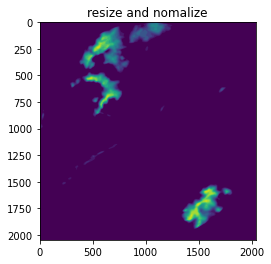

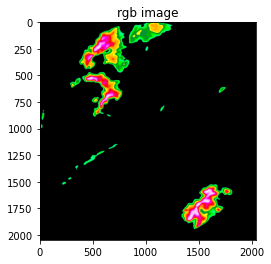

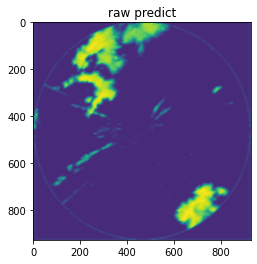

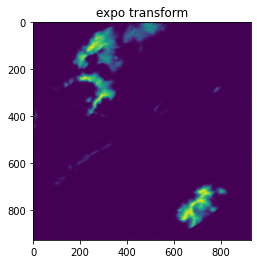

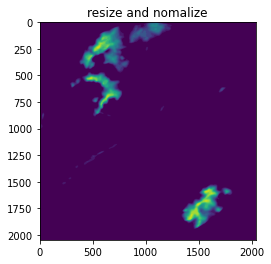

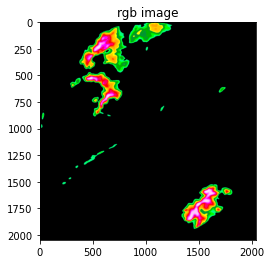

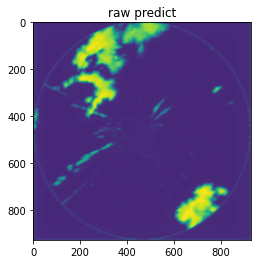

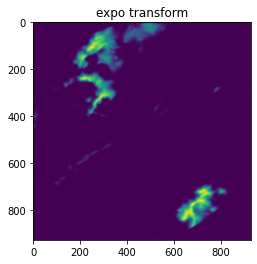

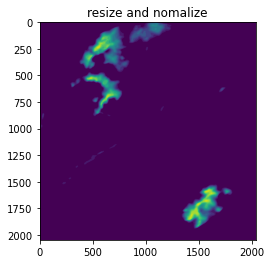

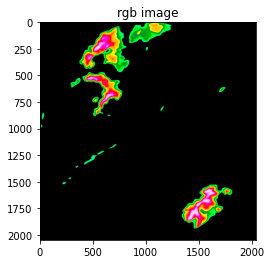

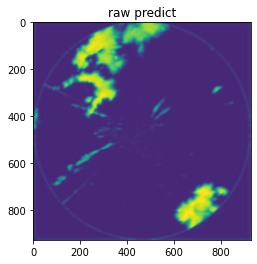

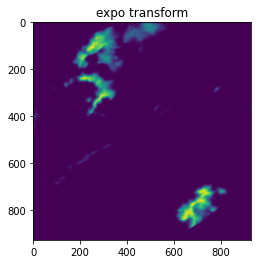

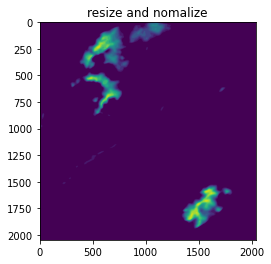

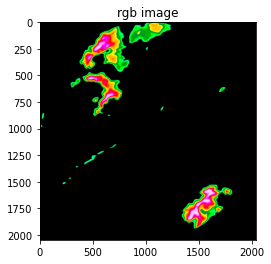

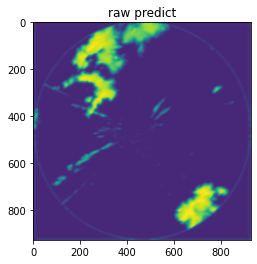

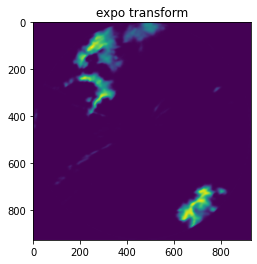

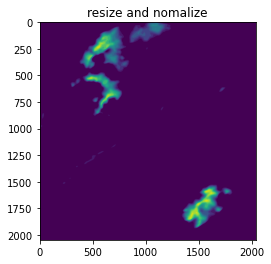

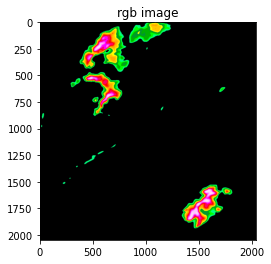

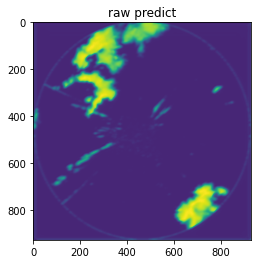

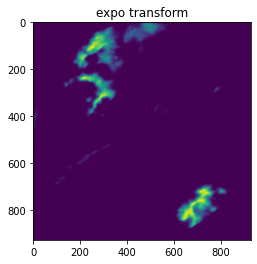

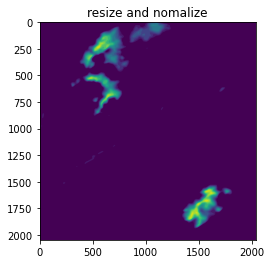

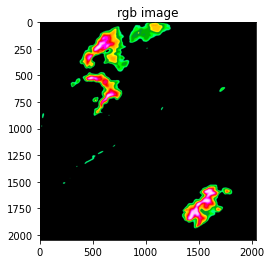

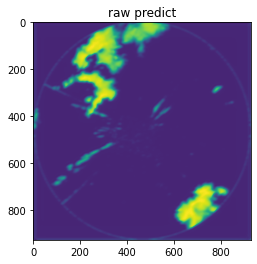

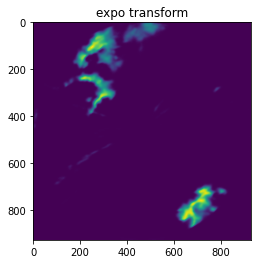

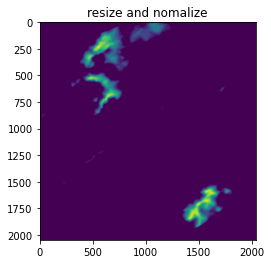

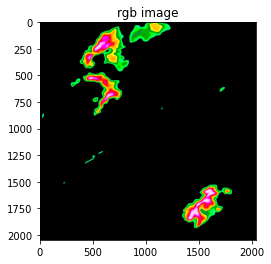

In [82]:
nowcasts2 = prediction_n_time_frame(model,x2)

In [83]:
for i in range(len(nowcasts2)):
  create_alpha_image(nowcasts2[i],f'test_1620126438_+{5*(i+1)} mins')

In [ ]:
x.shape

(1, 928, 928, 4)

In [ ]:
y_pred = model.predict(x)

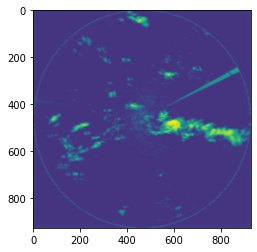

In [ ]:
plt.imshow(np.squeeze(y_pred))

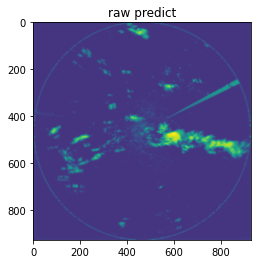

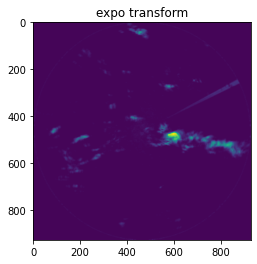

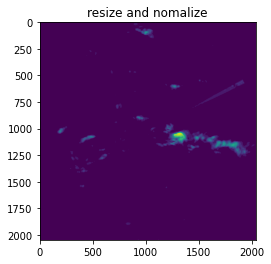

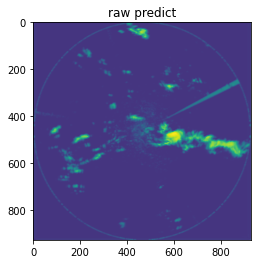

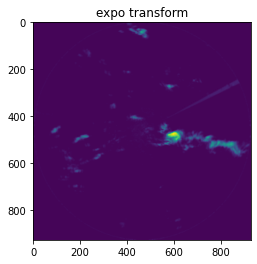

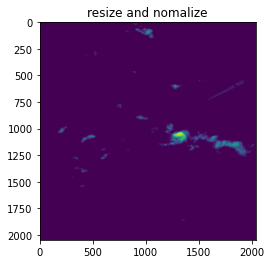

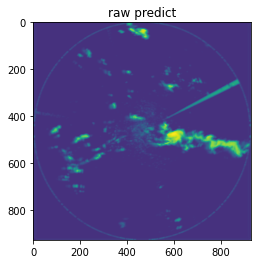

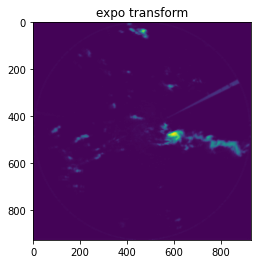

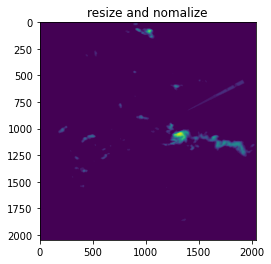

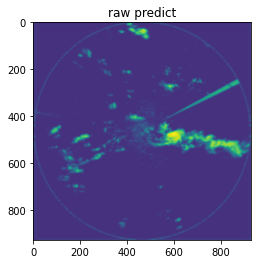

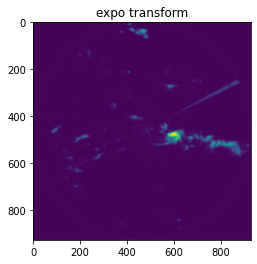

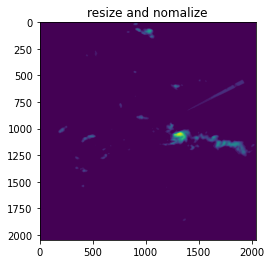

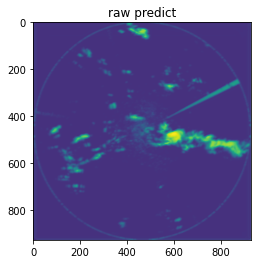

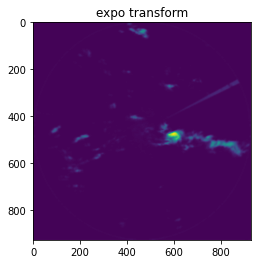

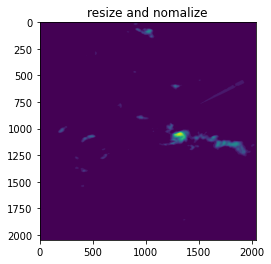

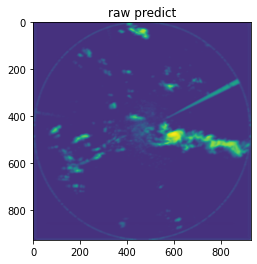

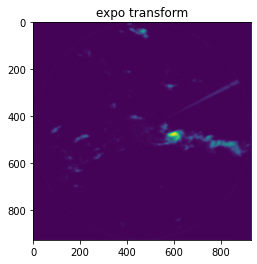

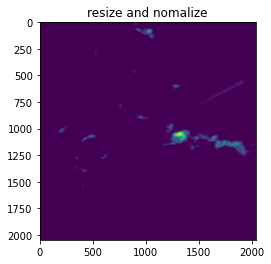

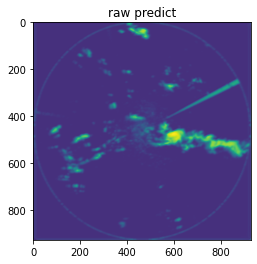

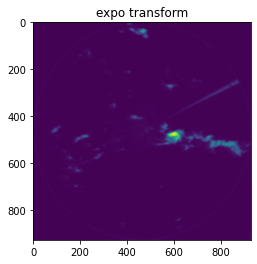

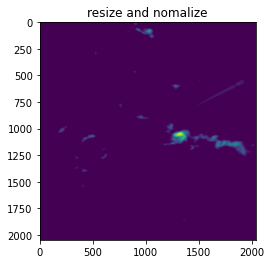

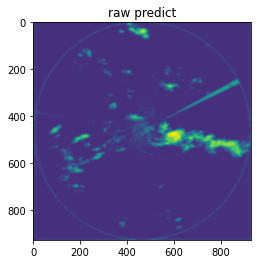

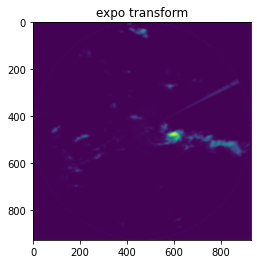

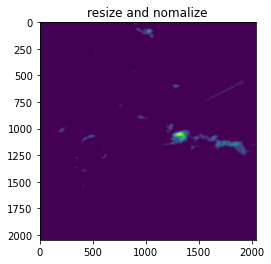

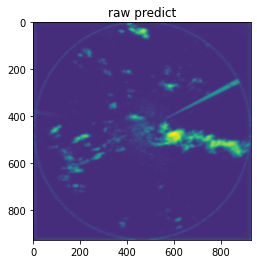

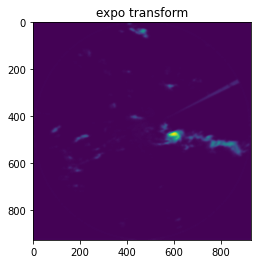

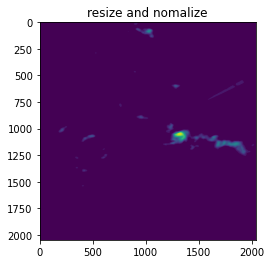

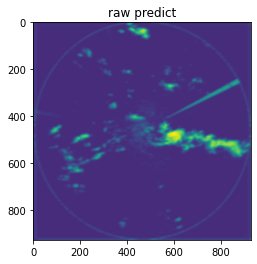

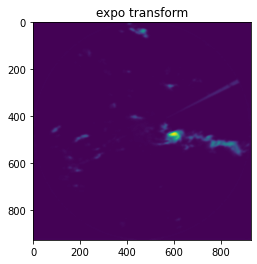

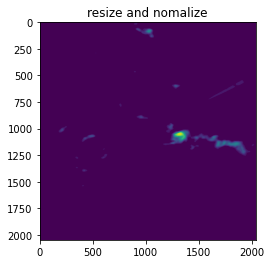

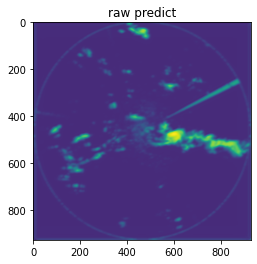

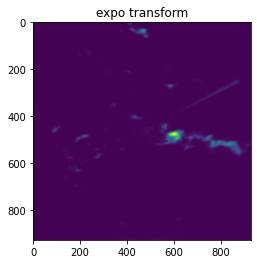

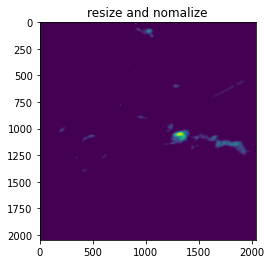

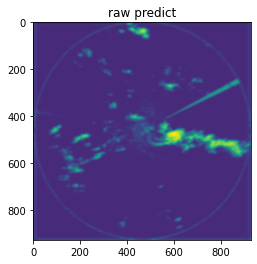

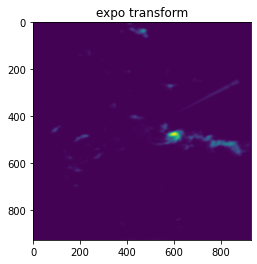

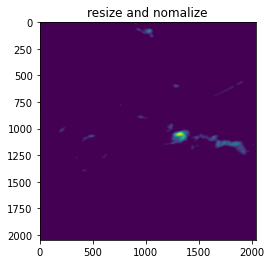

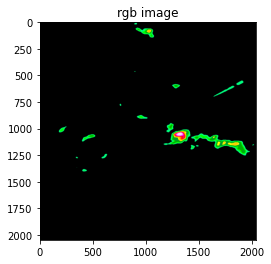

In [ ]:
nowcasts = prediction_n_time_frame(model,x)

In [77]:
for i in range(len(nowcasts)):
  create_alpha_image(nowcasts[i],f'test_+{5*(i+1)} mins')

In [ ]:
cv2.imwrite('test_out.png', cv2.cvtColor(res_img, cv2.COLOR_RGB2BGR))  